<a href="https://colab.research.google.com/github/arijitar/Machine-Learning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

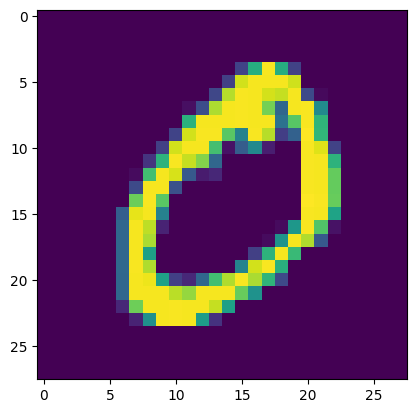

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8616 - loss: 0.4884 - val_accuracy: 0.9588 - val_loss: 0.1402
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9625 - loss: 0.1265 - val_accuracy: 0.9602 - val_loss: 0.1258
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9754 - loss: 0.0822 - val_accuracy: 0.9647 - val_loss: 0.1178
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9818 - loss: 0.0593 - val_accuracy: 0.9716 - val_loss: 0.0925
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9865 - loss: 0.0423 - val_accuracy: 0.9717 - val_loss: 0.0963
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9906 - loss: 0.0315 - val_accuracy: 0.9736 - val_loss: 0.0937
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9732 - val_loss: 0.1045
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0212

In [24]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.3814057e-18, 1.3078621e-16, 4.2700002e-12, ..., 9.9999994e-01,
        1.9564872e-14, 1.2230349e-12],
       [8.3035078e-19, 9.4629539e-12, 9.9999994e-01, ..., 9.2433798e-22,
        6.3537812e-12, 2.7979710e-26],
       [3.3334555e-14, 9.9999899e-01, 6.0854184e-08, ..., 1.5080607e-08,
        8.5146780e-07, 1.7799679e-13],
       ...,
       [4.6100591e-29, 9.4834054e-20, 1.3476289e-24, ..., 3.2471578e-15,
        5.2129296e-15, 1.2364254e-12],
       [2.7387288e-26, 5.0289170e-28, 3.1094971e-21, ..., 8.1374208e-23,
        1.3207581e-07, 3.1119757e-22],
       [1.7600265e-18, 5.2801223e-20, 1.2110337e-16, ..., 3.4293087e-34,
        1.5578516e-19, 8.7657275e-21]], dtype=float32)

In [25]:
y_pred = y_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9771

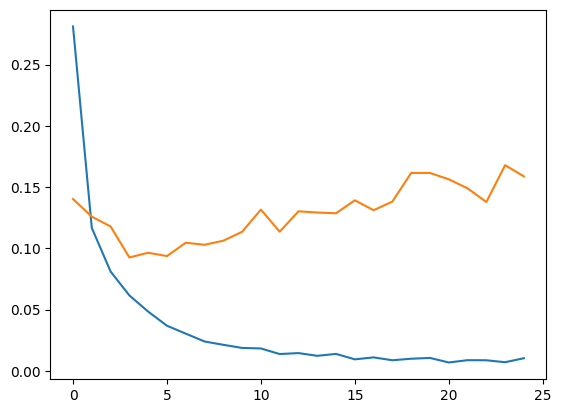

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

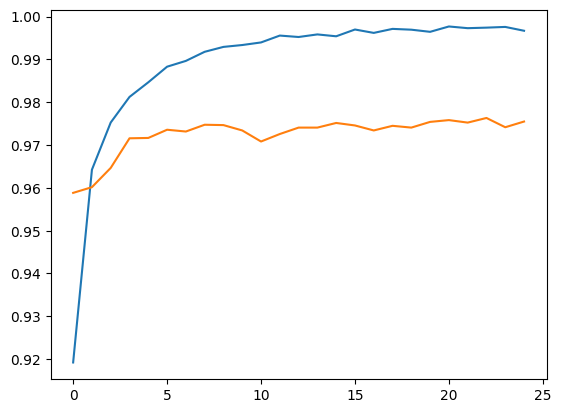

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')


In [29]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

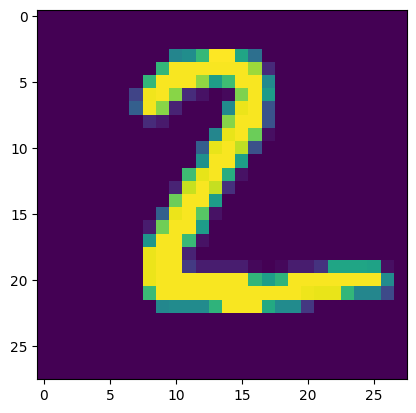

In [35]:
plt.imshow(X_test[1])

In [34]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([2])